In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# for our model we just need location price bhk area and bath only so remove the remaining
df1 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# let's check Nan in the data
df1.isna().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [8]:
df1.shape

(13320, 5)

In [10]:
# for the location we have nothing left to do but drop it
df2 = df1[df1['location'].isna()==False].copy()
df2.shape

(13319, 5)

In [12]:
df2['bath'] = df2['bath'].fillna(df2['bath'].mean())
df2.isna().any()

location      False
size           True
total_sqft    False
bath          False
price         False
dtype: bool

In [14]:
# let us check the size column it seems kinda simple filteration
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# we have NAN and normal strings ,now let's convert into bhk units and let's do that in different new column 
df2['bhk'] = df2['size'].apply(lambda x: None if x is np.nan else float(x.split()[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [18]:
df2['bhk'] = df2['bhk'].fillna(df2['bhk'].mean())

In [20]:
df2.isna().any()

location      False
size           True
total_sqft    False
bath          False
price         False
bhk           False
dtype: bool

In [22]:
df3 = df2.drop('size',axis = 'columns').copy()
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [24]:
# so we add for 2 more useful columns for the filtewration of the outliers
# but first we need to check the area column
for word in df3['total_sqft']:
    for c in word:
        if not c.isdigit():
            print(c,end = '')

 - . -  -  -  - . -  -  - ...Sq. Meter. -  - Perch -  -  -  -  - Sq. Meter -  - Sq. Yards -  -  -  -  - ..AcresAcres -  -  -  - ..Sq. Meter. - .. -  - . -  -  -  - Sq. Meter - .Sq. Meter -  - Sq. Yards - ... -  - . - . -  - .Sq. Yards. -  - .. - . -  -  - . -  -  -  - Sq. Yards -  -  - . - ... - . - Sq. MeterSq. Yards. -  -  - . - .. - . - . -  -  -  - Sq. Meter -  - . -  - .. - Sq. Yards -  - .. - . -  -  -  -  -  -  -  - Cents - . - ...Sq. Yards - Sq. Meter -  - Sq. Yards..Sq. Yards.. - . -  -  -  -  - .Sq. Meter. -  -  - .. -  - Sq. Yards - .Sq. Meter.Acres -  -  -  -  - Guntha -  - Sq. Meter -  -  - . -  - . - . - .Sq. Meter -  - Cents..Sq. Yards. - Acres -  - ..Sq. Meter.Acres. -  -  - .Acres - .. -  -  -  - . - . -  -  - . - .Sq. Yards -  -  -  -  -  -  - . -  - . -  -  -  -  -  -  - .. -  - ..Grounds -  - Sq. Yards - .Sq. Meter -  -  -  - .. - . - . -  -  - .Acres.Sq. Meter -  -  - . - . - . -  - .. -  - .. - ... -  - .Guntha. -  -  -  -  -  - Acres -  -  -  - . - .. - . - Sq. Y

In [26]:
# yeah from this we can say that we need to convert every unit in to sqft for the proper analysis
def into_sqft(df):
    l = []
    units = {
        
        'Sq. Meter':10.764,
        'Sq. Yards':9,
        'Perch':272.25,
        "Acre": 43560,
        "Guntha": 1089,
        "Grounds": 2400,
        "Cents": 435.6,
        '': 1.0
    }
    for word in df['total_sqft']:
        if '-' in word:
            x = word.split('-')
            l.append((float(x[0])+float(x[1]))/2)
            continue
        for key,val in units.items():
            if key in word:
                if key=='':
                    key = ' '
                l.append(float(word.split(key)[0])*val)
                break
    return l


In [28]:
df3['sqft'] = into_sqft(df3)
df3.head()

,location,total_sqft,bath,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,39.07,2.0,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0,2600.0
2,Uttarahalli,1440,2.0,62.00,3.0,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0,1521.0
4,Kothanur,1200,2.0,51.00,2.0,1200.0


In [30]:
# lets include price_per_area and area_per_bhk and also the bathrooms relation with bhk rooms
df3[df3['bath']>df3['bhk']+2]
# this not a good indicator for the evaluation so we remove it

,location,total_sqft,bath,price,bhk,sqft
1078,BTM 1st Stage,3300,14.0,500.0,9.0,3300.0
1953,KR Puram,1200,12.0,110.0,8.0,1200.0
1979,Hongasandra,990,12.0,120.0,8.0,990.0
2620,Sathya Sai Layout,11338,9.0,1000.0,6.0,11338.0
6838,Rajaji Nagar,7500,8.0,1700.0,5.0,7500.0
6937,5th Block Hbr Layout,2600,12.0,675.0,9.0,2600.0
7709,Chikkabanavar,2460,7.0,80.0,4.0,2460.0
8106,Wilson Garden,1850,12.0,300.0,8.0,1850.0
9974,Sector 1 HSR Layout,2400,6.0,775.0,3.0,2400.0
9990,Doddakannelli,1200,9.0,122.0,6.0,1200.0


In [32]:
df4 = df3[df3['bhk']+2>=df3['bath']].copy()
df4.copy()

,location,total_sqft,bath,price,bhk,sqft
0,Electronic City Phase II,1056,2.0,39.07,2.0,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0,2600.0
2,Uttarahalli,1440,2.0,62.00,3.0,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0,1521.0
4,Kothanur,1200,2.0,51.00,2.0,1200.0
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0,3453.0
13316,Richards Town,3600,5.0,400.00,4.0,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0,1141.0
13318,Padmanabhanagar,4689,4.0,488.00,4.0,4689.0


In [34]:
df4['sqft_per_bhk'] = df4['sqft']/df4['bhk']  
df4['price_per_sqft'] = 100000*df4['price']/df4['sqft']

In [36]:
df4.head()

,location,total_sqft,bath,price,bhk,sqft,sqft_per_bhk,price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2.0,1056.0,528.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4.0,2600.0,650.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3.0,1440.0,480.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3.0,1521.0,507.0,6245.890861
4,Kothanur,1200,2.0,51.00,2.0,1200.0,600.0,4250.000000


In [38]:
# area for a bhk is at least 300 sqft so lets remove all the other missleneous
df4[df4['sqft_per_bhk']<=300]

,location,total_sqft,bath,price,bhk,sqft,sqft_per_bhk,price_per_sqft
9,Gandhi Bazar,1020,6.0,370.0,6.0,1020.0,170.000000,36274.509804
45,HSR Layout,600,9.0,200.0,8.0,600.0,75.000000,33333.333333
58,Murugeshpalya,1407,4.0,150.0,6.0,1407.0,234.500000,10660.980810
68,Devarachikkanahalli,1350,7.0,85.0,8.0,1350.0,168.750000,6296.296296
70,Double Road,500,3.0,100.0,3.0,500.0,166.666667,20000.000000
...,...,...,...,...,...,...,...,...
13281,Margondanahalli,1375,5.0,125.0,5.0,1375.0,275.000000,9090.909091
13300,Hosakerehalli,1500,6.0,145.0,5.0,1500.0,300.000000,9666.666667
13303,Vidyaranyapura,774,5.0,70.0,5.0,774.0,154.800000,9043.927649
13306,Rajarajeshwari Nagara,1200,5.0,325.0,4.0,1200.0,300.000000,27083.333333


In [40]:
df5 = df4[df4['sqft_per_bhk']>300].copy()
df5.shape

(12380, 8)

In [42]:
df5['price_per_sqft'].describe()
# we can see that the minimum is 2 rupees which is a meaningless sentence and also we put a threshold price of 1000rs persqft

count     12380.000000
mean       6186.523122
std        3991.562215
min           2.257423
25%        4199.163212
50%        5263.157895
75%        6823.650137
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
df5[df5['price_per_sqft']<=1000].shape

(30, 8)

In [46]:
df6 = df5[df5['price_per_sqft']>1000]
df6.shape

(12350, 8)

In [48]:
df6['sqft'].describe()

count    12350.000000
mean      1585.200723
std       1053.958678
min        340.000000
25%       1115.000000
50%       1305.000000
75%       1705.000000
max      36000.000000
Name: sqft, dtype: float64

In [50]:
# so now the real removal begins 
# lets see for each location how many flats are there
l = []
for loc,df_loc in df6.groupby('location'):
    l.append(len(df_loc))
for i in np.sort(l):
    print(i,end = ' ')
print('\n',len(df6),np.sum(l))

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [52]:
# lets push all the locations less than or equal to 10 becuase they are plenty less to calculate and espicially makes inefficient for the linerregression model
# to work properly not only that but also remaining type of models
def dump_into_others_category(df):
    new_df = pd.DataFrame()
    for loc,df_loc in df.groupby('location'):
        if(len(df_loc)<=10): continue
        new_df = pd.concat([new_df,df_loc.copy()],ignore_index = True)
    return new_df


In [54]:
df7 = dump_into_others_category(df6)
df7.head()

,location,total_sqft,bath,price,bhk,sqft,sqft_per_bhk,price_per_sqft
0,Devarachikkanahalli,1250,2.0,44.0,3.0,1250.0,416.666667,3520.000000
1,Devarachikkanahalli,1250,2.0,40.0,2.0,1250.0,625.000000,3200.000000
2,Devarachikkanahalli,1200,2.0,83.0,2.0,1200.0,600.000000,6916.666667
3,Devarachikkanahalli,1170,2.0,40.0,2.0,1170.0,585.000000,3418.803419
4,Devarachikkanahalli,1200,3.0,160.0,3.0,1200.0,400.000000,13333.333333


In [56]:
df7.shape,df6.shape

((9671, 8), (12350, 8))

In [58]:
# before that let us take a visualisation confirmation for this
# lets take a location with nearly 100 flats in it 
for loc,df_loc in df7.groupby('location'):
    if(len(df_loc)>100):
        print(loc,len(df_loc))
        

7th Phase JP Nagar 146
Bannerghatta Road 150
Electronic City 292
Electronic City Phase II 127
Haralur Road 140
Hebbal 175
Hennur Road 150
Kanakpura Road 269
Marathahalli 170
Raja Rajeshwari Nagar 168
Sarjapur  Road 395
Thanisandra 232
Uttarahalli 178
Whitefield 538
Yelahanka 204


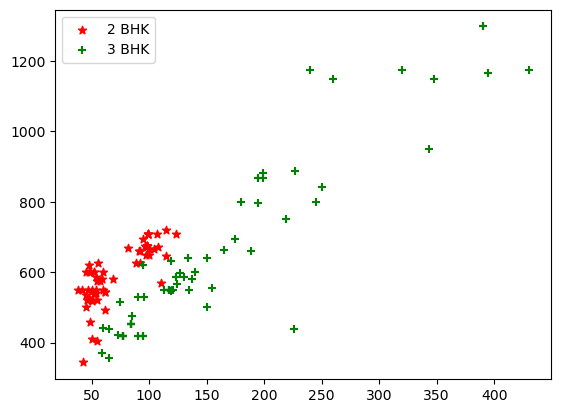

In [60]:
# lets take Hebbal and for our reference lets take 2 and 3 bhk flats
a = df7[(df7['location']=='Hebbal') & (df7['bhk']==2)]
b= df7[(df7['location']=='Hebbal') & (df7['bhk']==3)]
plt.scatter(a['price'],a['sqft_per_bhk'],color = 'red',marker = '*',label = '2 BHK')
plt.scatter(b['price'],b['sqft_per_bhk'],color = 'green',marker = '+',label = '3 BHK')
plt.legend()
plt.show()

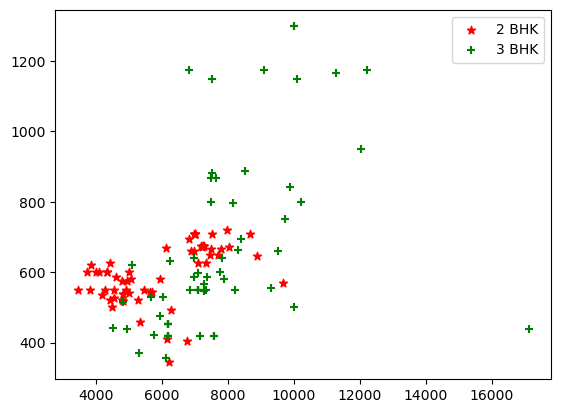

In [62]:
a = df7[(df7['location']=='Hebbal') & (df7['bhk']==2)]
b= df7[(df7['location']=='Hebbal') & (df7['bhk']==3)]
plt.scatter(a['price_per_sqft'],a['sqft_per_bhk'],color = 'red',marker = '*',label = '2 BHK')
plt.scatter(b['price_per_sqft'],b['sqft_per_bhk'],color = 'green',marker = '+',label = '3 BHK')
plt.legend()
plt.show()

In [64]:
# here we can choose price or price per sqft on the axis but if we see this in the contes of supply and  demand it is  preferable to use the price
# and if we think in muuch deeper if we choose price_per_sqft-std_of_it will be better right for and for this lets just check the contribution
# of std in the mean for location
count = 0
for loc,df_loc in df7.groupby('location'):
    count+=1
    if(count>20): break
    for bhk,df_bhk in df_loc.groupby('bhk'):
        m = np.mean(df_bhk['price_per_sqft'])
        s = np.std(df_bhk['price_per_sqft'])
        print((100*s)/m,"mean =",m)

26.62401965827361 mean = 4278.151140436048
57.22774396177773 mean = 5892.246384227782
11.509422261718308 mean = 6726.570336093429
19.341649602242686 mean = 7931.806799837383
11.525621017833544 mean = 9151.192151725822
55.101963475229894 mean = 10916.59953085162
0.0 mean = 15909.09090909091
0.0 mean = 4952.380952380952
15.89626749305639 mean = 4138.888888888889
13.891496917919163 mean = 3837.9627511096874
8.023483365949122 mean = 4628.623188405797
14.853343855822194 mean = 5050.1545463598995
11.797265634164551 mean = 5243.206144601114
0.0 mean = 9500.0
1.7341040462427746 mean = 4325.0
0.0 mean = 3800.0
5.660377358490566 mean = 13250.0
24.93128725669191 mean = 6209.522278289134
32.45594289300478 mean = 7174.961119532826
0.0 mean = 7704.160246533128
42.372866507023765 mean = 8755.555555555557
34.78221939244538 mean = 5707.211635235036
25.199878919189953 mean = 6493.028569222926
31.9984075568087 mean = 10026.768004657039
0.0 mean = 15000.0
0.0 mean = 8858.267716535433
0.0 mean = 3541.66666

In [66]:
# lets put the limit to the 15 percent and then we go with the price_per_sqft directly so lets do this in our prev function
# now the final filteration is the prices comparision of bhk prices of same location
# for similar area or similar area_per_bhk higher bhks should be more than the lower bhk plots 
# but but but these are just the real world problems for the prediction  this may not be the better one so we just calculate based on the normal mean
def remove_abnormal_flats(df):
    exclude = []
    for loc,df_loc in df.groupby('location'):
        bhk_dict = {}
        for bhk,df_bhk in df_loc.groupby('bhk'):
            bhk_dict[bhk] = {
                'mean':np.mean(df_bhk['price_per_sqft']),
                'count':len(df_bhk)
            }   
        for bhk,df_bhk in df_loc.groupby('bhk'):
            prev = bhk_dict.get(bhk-1)
            if prev and prev['count']>=5:
                exclude.extend(df_bhk[df_bhk['price_per_sqft']<=prev['mean']].index.values)
    return df.drop(exclude,axis = 'index')
df8 = remove_abnormal_flats(df7)
df8.shape,df7.shape

# we do not uswe the concat method because it is too time costly (o(n*n))

((7012, 8), (9671, 8))

In [68]:
df8.head()

,location,total_sqft,bath,price,bhk,sqft,sqft_per_bhk,price_per_sqft
1,Devarachikkanahalli,1250,2.0,40.0,2.0,1250.0,625.0,3200.000000
2,Devarachikkanahalli,1200,2.0,83.0,2.0,1200.0,600.0,6916.666667
3,Devarachikkanahalli,1170,2.0,40.0,2.0,1170.0,585.0,3418.803419
4,Devarachikkanahalli,1200,3.0,160.0,3.0,1200.0,400.0,13333.333333
5,Devarachikkanahalli,1425,2.0,65.0,3.0,1425.0,475.0,4561.403509


In [70]:
y = df8['price']

In [72]:
dummy = pd.get_dummies(df7['location'])
dummy.head()

,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
dummy['others'] = False
dummy.head()

,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
x = df8.drop(['location','price_per_sqft','sqft_per_bhk','total_sqft','price'],axis = 'columns').copy()
x.head()

,bath,bhk,sqft
1,2.0,2.0,1250.0
2,2.0,2.0,1200.0
3,2.0,2.0,1170.0
4,3.0,3.0,1200.0
5,2.0,3.0,1425.0


In [78]:
x.loc[:,dummy.columns] = dummy
x.head()

,bath,bhk,sqft,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,2.0,2.0,1250.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2.0,1200.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,1170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,3.0,1200.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2.0,3.0,1425.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model.fit(x_train,y_train)

LinearRegression()

In [82]:
model.score(x_test,y_test)

0.7840060836625757

In [84]:
# we have polished our data but we just need to confirm it
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [86]:
x.columns

Index(['bath', 'bhk', 'sqft', ' Devarachikkanahalli', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'others'],
      dtype='object', length=222)

In [88]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))